In [23]:
import torch

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from torch.autograd import Variable

### Define Function

In [56]:
# Training Data
def get_data():
    train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
    train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
    dtype = torch.FloatTensor
    X = Variable(torch.from_numpy(train_X).type(dtype),requires_grad=False).view(17,1)
    y = Variable(torch.from_numpy(train_Y).type(dtype),requires_grad=False)
    return X,y

def plot_variable(x,y,z='',**kwargs):
    l = []
    for a in [x,y]:
        if type(a) == Variable:
            l.append(a.data.numpy())
    plt.plot(l[0],l[1],z,**kwargs)

def get_weights():
    w = Variable(torch.randn(1),requires_grad = True)
    b = Variable(torch.randn(1),requires_grad=True)
    return w,b

def simple_network(x):
    y_pred = torch.matmul(x,w)+b
    return y_pred

def loss_fn(y,y_pred):
    loss = (y_pred-y).pow(2).sum()
    for param in [w,b]:
        if not param.grad is None: param.grad.data.zero_()
    loss.backward()
    
    backLoss = (y_pred-y).sum()*2
    print ("backLoss: ", backLoss.item())
    print("loss.grad", loss.grad)
    #return loss.data[0]
    return loss


def optimize(learning_rate):
    w.data -= learning_rate * w.grad.data
    b.data -= learning_rate * b.grad.data

learning_rate = 1e-4

### Retreive Data and Weigh

In [57]:
x,y = get_data()               # x - represents training data,y - represents target variables
w,b = get_weights()           # w,b - Learnable parameters

Plot X and Y


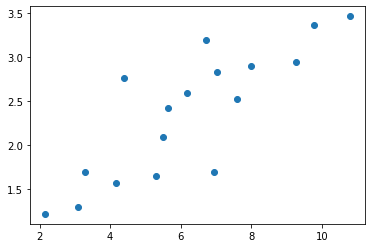

In [58]:
print ("Plot X and Y")
plt.scatter(x, y)

In [59]:
print("W and B")
w.item(), b.item()

W and B


(-1.1724963188171387, 0.5144639611244202)

In [60]:
print("Initial Learning Rate: ")
print(learning_rate)

Initial Learning Rate: 
0.0001


### Meat

In [61]:
for i in range(500):
    y_pred = simple_network(x) # function which computes wx + b
    loss = loss_fn(y,y_pred)   # calculates sum of the squared differences of y and y_pred   
    if i % 100 == 0: 
        print("Actual Loss: ",loss.item())
    optimize(learning_rate)    # Adjust w,b to minimize the loss

backLoss:  -311.2785339355469
loss.grad None
Actual Loss:  1616.5347900390625
backLoss:  -263.5344543457031
loss.grad None
backLoss:  -223.12127685546875
loss.grad None
backLoss:  -188.9134063720703
loss.grad None
backLoss:  -159.95802307128906
loss.grad None
backLoss:  -135.4486083984375
loss.grad None
backLoss:  -114.70255279541016
loss.grad None
backLoss:  -97.14193725585938
loss.grad None
backLoss:  -82.27767181396484
loss.grad None
backLoss:  -69.69574737548828
loss.grad None
backLoss:  -59.045719146728516
loss.grad None
backLoss:  -50.03094482421875
loss.grad None
backLoss:  -42.40033721923828
loss.grad None
backLoss:  -35.941368103027344
loss.grad None
backLoss:  -30.474124908447266
loss.grad None
backLoss:  -25.84634017944336
loss.grad None
backLoss:  -21.929115295410156
loss.grad None
backLoss:  -18.613346099853516
loss.grad None
backLoss:  -15.806684494018555
loss.grad None
backLoss:  -13.430953979492188
loss.grad None
backLoss:  -11.4199857711792
loss.grad None
backLoss:  -9

D:\Softwares\anaconda3\envs\py39\lib\site-packages\torch\_tensor.py:1013: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten\src\ATen/core/TensorBody.h:417.)
  return self._grad


backLoss:  -0.3096797466278076
loss.grad None
backLoss:  -0.3095555305480957
loss.grad None
backLoss:  -0.30942392349243164
loss.grad None
backLoss:  -0.3092920780181885
loss.grad None
backLoss:  -0.3091609477996826
loss.grad None
backLoss:  -0.309039831161499
loss.grad None
backLoss:  -0.308910608291626
loss.grad None
backLoss:  -0.30878353118896484
loss.grad None
backLoss:  -0.3086535930633545
loss.grad None
backLoss:  -0.30852556228637695
loss.grad None
backLoss:  -0.3083982467651367
loss.grad None
backLoss:  -0.3082711696624756
loss.grad None
backLoss:  -0.30814552307128906
loss.grad None
backLoss:  -0.3080179691314697
loss.grad None
backLoss:  -0.3078925609588623
loss.grad None
backLoss:  -0.3077671527862549
loss.grad None
backLoss:  -0.30764341354370117
loss.grad None
backLoss:  -0.30751848220825195
loss.grad None
backLoss:  -0.3073880672454834
loss.grad None
backLoss:  -0.30725812911987305
loss.grad None
backLoss:  -0.3071291446685791
loss.grad None
backLoss:  -0.307000160217285

backLoss:  -0.28725743293762207
loss.grad None
backLoss:  -0.2871401309967041
loss.grad None
backLoss:  -0.2870199680328369
loss.grad None
backLoss:  -0.28690147399902344
loss.grad None
backLoss:  -0.2867856025695801
loss.grad None
backLoss:  -0.2866690158843994
loss.grad None
backLoss:  -0.28655338287353516
loss.grad None
backLoss:  -0.2864367961883545
loss.grad None
backLoss:  -0.2863197326660156
loss.grad None
Actual Loss:  2.6257102489471436
backLoss:  -0.2862060070037842
loss.grad None
backLoss:  -0.2860848903656006
loss.grad None
backLoss:  -0.2859654426574707
loss.grad None
backLoss:  -0.2858450412750244
loss.grad None
backLoss:  -0.285724401473999
loss.grad None
backLoss:  -0.28560543060302734
loss.grad None
backLoss:  -0.28548669815063477
loss.grad None
backLoss:  -0.2853670120239258
loss.grad None
backLoss:  -0.2852482795715332
loss.grad None
backLoss:  -0.28513097763061523
loss.grad None
backLoss:  -0.28501272201538086
loss.grad None
backLoss:  -0.2848975658416748
loss.grad 